In [1]:
# !pip install lazypredict

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from lazypredict.Supervised import LazyClassifier

from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


In [3]:
df = pd.read_csv("winequality_red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.20,0.60,0.08,2.00,0.09,32.00,44.00,0.99,3.45,0.58,10.50,5
1595,5.90,0.55,0.10,2.20,0.06,39.00,51.00,1.00,3.52,0.76,11.20,6
1596,6.30,0.51,0.13,2.30,0.08,29.00,40.00,1.00,3.42,0.75,11.00,6
1597,5.90,0.65,0.12,2.00,0.07,32.00,44.00,1.00,3.57,0.71,10.20,5


The data set consists following Input variables :
1 - fixed acidity  2 - volatile acidity  3 - citric acid  4 - residual sugar  5 - chlorides  6 - free sulfur dioxide

7 - total sulfur dioxide  8 - density  9 - pH   10 - sulphates   11 - alcohol

and the Output variable gives the quality of th wine based on the input variables: 

12 - quality (score between 0 and 10)

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We can see there is no missing data in the columns. Great!!

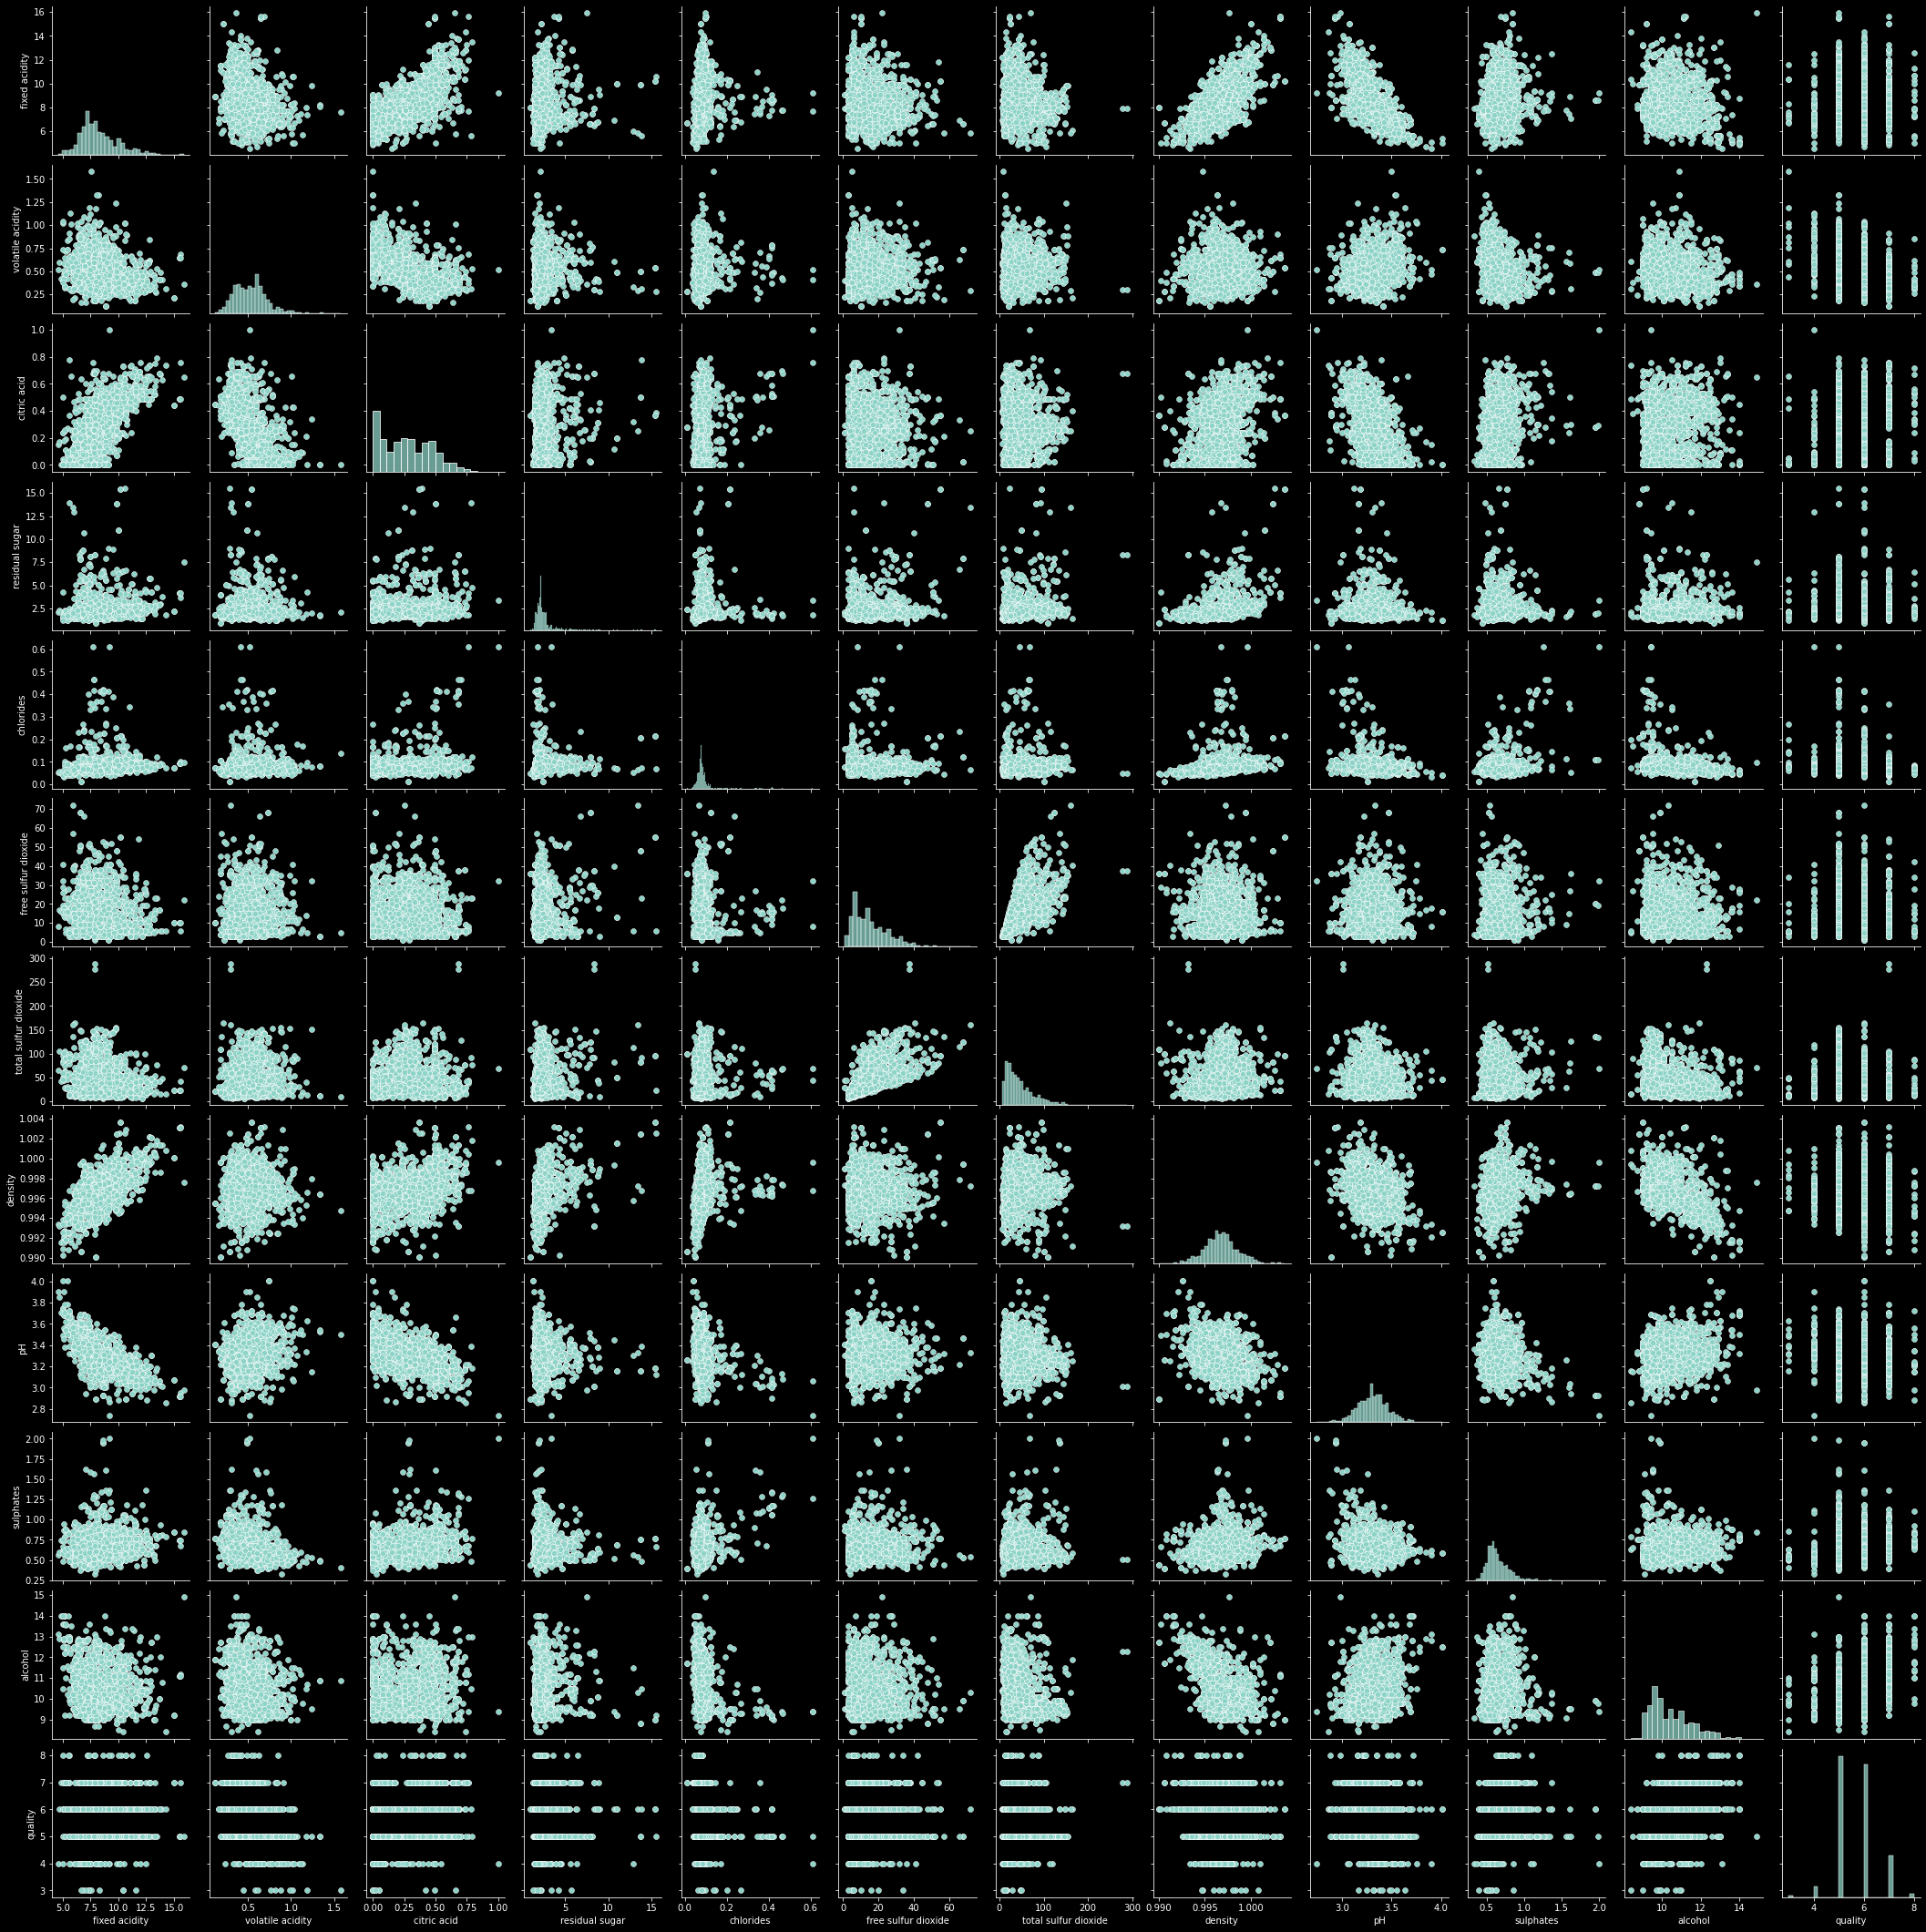

In [6]:
sns.pairplot(df)

<AxesSubplot:>

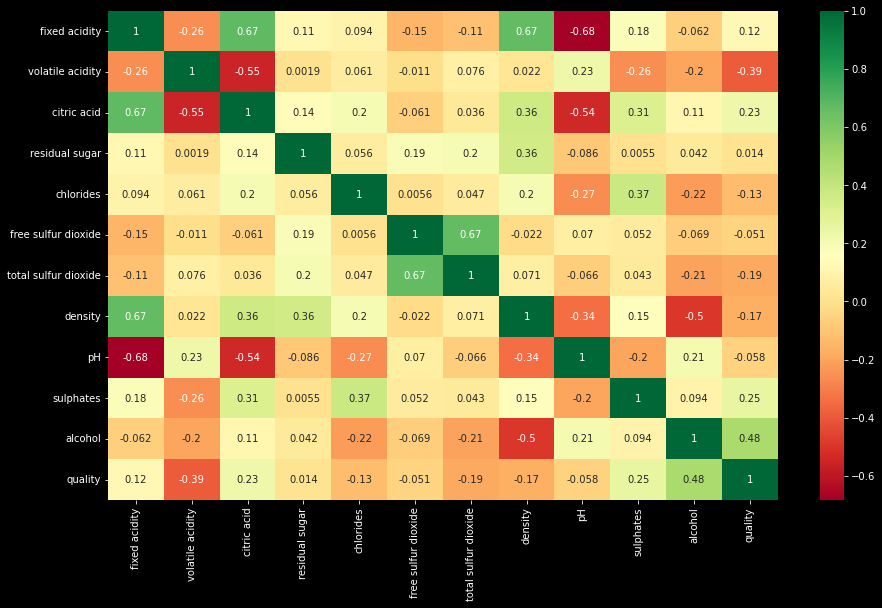

In [7]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

From the above heatmap we can easily see that there is no Multicollinearity nor any of the feature is very highly correlated with the target i.e "quality" column.

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

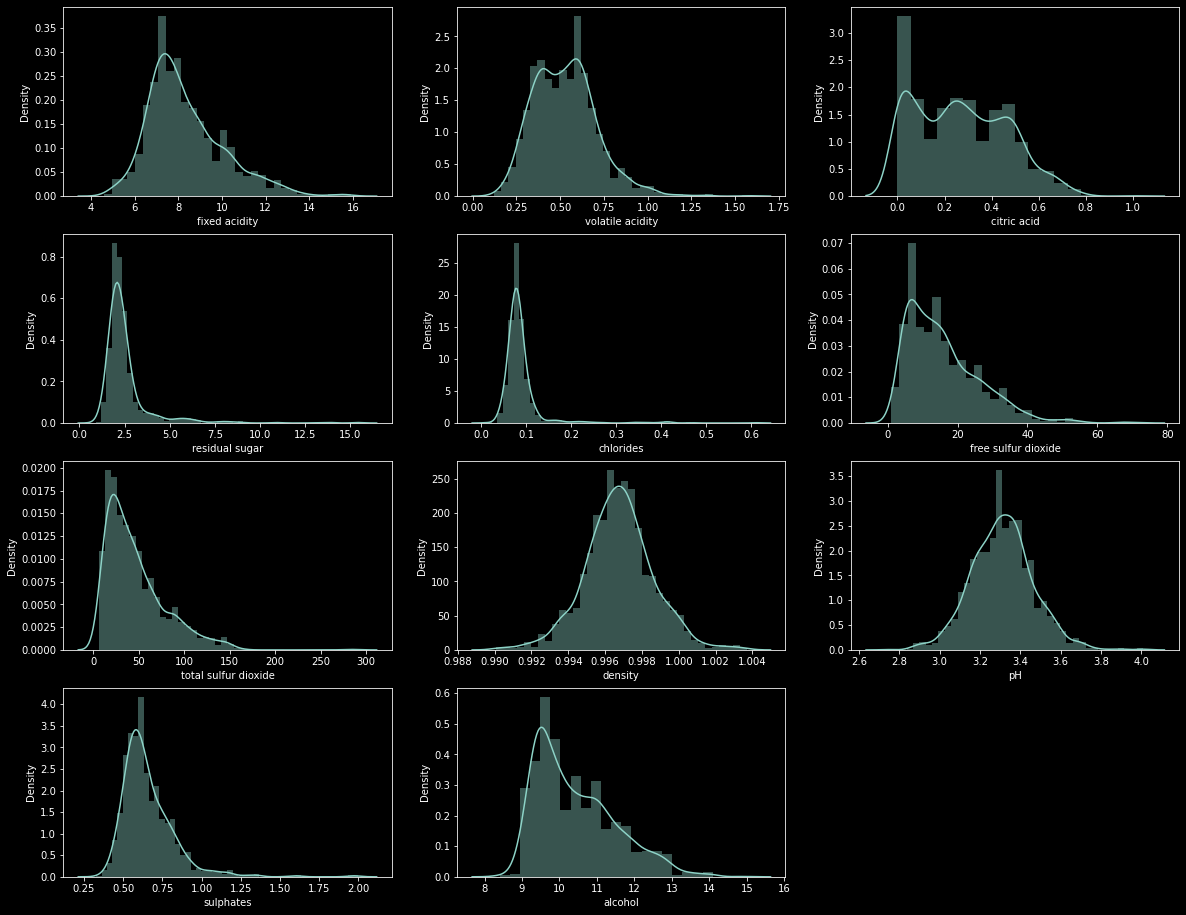

In [9]:
c=1
plt.figure(figsize=(20,16))

for i in list(df.columns)[:-1]:
    plt.subplot(4,3,c)
    sns.distplot(df[i])
    c = c + 1

plt.show()    

In [10]:
X = df.drop(columns = 'quality')
y = df['quality']

In [11]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [12]:
clf = LazyClassifier(ignore_warnings=True, custom_metric=None)
model,predictions = clf.fit(X_train, X_test, y_train, y_test)
model

 93%|█████████▎| 27/29 [00:01<00:00, 17.70it/s]

[14:53:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 29/29 [00:03<00:00,  7.75it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.64,0.37,None,0.64,0.01
GaussianNB,0.53,0.36,None,0.53,0.01
XGBClassifier,0.66,0.34,None,0.65,1.61
ExtraTreesClassifier,0.69,0.34,None,0.67,0.18
RandomForestClassifier,0.67,0.34,None,0.65,0.24
BaggingClassifier,0.65,0.34,None,0.64,0.06
LGBMClassifier,0.66,0.33,None,0.65,0.38
LabelPropagation,0.59,0.33,None,0.59,0.06
LabelSpreading,0.59,0.33,None,0.59,0.08


Now we haven't done any prerocessing with our data and neither done any hyper parameter tunings.Let's do all those and see how our score improves.

In [13]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 355)

Although our dataset is realtively small, let's use PCA for feature selection and see if it improves our accuracy.

In [15]:
from sklearn.decomposition import PCA

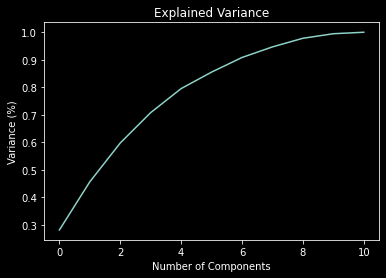

In [16]:
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

We can see that around 95% of the variance is being explained by 8 components.
So instead of giving all 11 columns as input in our algorithm let's use these 8 principal components instead.

In [17]:
pca = PCA(n_components=8)
new_data = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])

In [18]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,-1.62,0.45,-1.77,0.04,0.07,-0.91,-0.16,-0.28
1,-0.80,1.86,-0.91,0.55,-0.02,0.93,-1.01,0.76
2,-0.75,0.88,-1.17,0.41,-0.04,0.40,-0.54,0.60
3,2.36,-0.27,0.24,-0.93,-1.50,-0.13,0.34,-0.46
4,-1.62,0.45,-1.77,0.04,0.07,-0.91,-0.16,-0.28
...,...,...,...,...,...,...,...,...
1594,-2.15,0.81,0.62,0.41,-0.24,0.05,0.17,-0.36
1595,-2.21,0.89,1.81,0.41,0.12,-0.67,-0.61,-0.25
1596,-1.46,0.31,1.12,0.49,0.19,-0.51,-0.23,0.08
1597,-2.27,0.98,0.63,0.64,0.07,-0.86,-0.32,-0.47


In [19]:
# let's see how well our model perform on this new data
X_train, X_test, y_train, y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 355)

In [20]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
model,predictions = clf.fit(X_train, X_test, y_train, y_test)
model.sort_values(['Accuracy'],ascending=False)

 90%|████████▉ | 26/29 [00:01<00:00, 19.35it/s]

[14:53:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 29/29 [00:02<00:00, 11.80it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.66,0.33,None,0.64,0.24
XGBClassifier,0.65,0.34,None,0.64,0.41
ExtraTreesClassifier,0.65,0.32,None,0.63,0.16
BaggingClassifier,0.64,0.33,None,0.63,0.06
LGBMClassifier,0.62,0.31,None,0.61,0.41
LabelSpreading,0.62,0.34,None,0.62,0.07
LabelPropagation,0.62,0.34,None,0.62,0.05
SVC,0.60,0.28,None,0.58,0.13
DecisionTreeClassifier,0.59,0.29,None,0.58,0.01


As we can observe RandomForestClassifier gives us the best result, so now we will use this model, and we will also try to increase the accuracy by tuning it's Hyperparameters.

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [23]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [24]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions= random_grid, n_iter=100, cv = 5, verbose=2, n_jobs = -1)

In [25]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [26]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [27]:
rf_random.best_score_

0.6622117232543242

There is a little increase in our test accuracy. Great!!

In [28]:
rfc = RandomForestClassifier(**rf_random.best_params_)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.6583333333333333

In [29]:
rfc.score(X_test,y_test)

0.6583333333333333

Great!! Our test score has improved after using RandomizedSearchCV. We can try to use GridSearchCV as well, but it was taking a lot of time to fit the model, so that's why i chose RandomizedSearchCV. But you are welcome to try.

Now let's save the models using pickle library for future purposes

In [31]:
# let's save the model
import pickle

with open('/modelForPrediction.sav', 'wb') as f:
    pickle.dump(rfc,f)
    
with open('/standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

with open('/pca_model.sav', 'wb') as f:
    pickle.dump(pca,f)